# Decagon Training time with real database

50 epochs, SE=3, No protein features
* c-cb47@cmm.se:<br>
Total Time:$73588.72s\approx 20.44$h<br>
Virtual Memory:$104,711,553,024\approx104$Gb<br>
RSS Memory:$1,331,462,144\approx1.33$Gb<br>
+ nine@kth.se:<br>
Total Time:$73629.89s\approx 21.3$h<br>
Virtual Memory:$23,583,526,912\approx23$Gb<br>
RSS Memory:$835,149,824\approx835$Mb<br>


The accuracy values oscilate in both experiments, but in `nine` the oscilation has less amplitude (lower value of accuracy is $0.73$ not $0.68$)


# Time for calculation for Algoritmic Complexity (my computer)
Parallization of decomposition method

For a matrix of $16227\times 16227=238.05s\approx 4$ min in series.<br>
For a matrix of $16227\times 16227$ dividing it in $4$ pieces of $8113\times 8113=82.28s\approx 1.3$ min in parallel, jobs=4.<br>
For a matrix of $8113\times 8113=58.39s\approx 1$ min in series.<br>
For a matrix of $16226\times 16227$ dividing it in $16$ pieces of $\times 4056=89.67s\approx 1.3$ min in parallel, jobs=8.<br>

# Complexity of an adjacency matrix
The last values are always zero for matrices with dimensions non multiples of 4

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import numpy as np
from pybdm import BDM
from pybdm.partitions import PartitionIgnore, PartitionCorrelated, PartitionRecursive
from data.algorithms import PerturbationExperiment, NodePerturbationExperiment
import time

In [28]:
N = 10
bdm = BDM(ndim=2)
node_perturbation = NodePerturbationExperiment(bdm, metric='bdm',bipartite_network=False)
edge_perturbation = PerturbationExperiment(bdm,metric='bdm',bipartite_network=False)

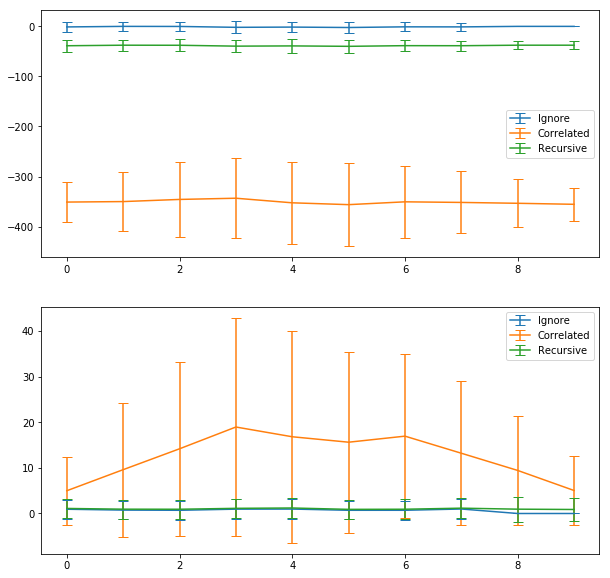

In [11]:
N = 10
nodes_ignore = []
nodes_recursive = []
nodes_correlated = []
edges_ignore = []
edges_recursive = []
edges_correlated = []
reps = 100
for i in range(reps):
    b = np.random.randint(0,2,(N,N))
    X = ((b + b.T)/2).astype(int)
    # Partition Ignore
    bdm = BDM(ndim=2, partition=PartitionIgnore)
    node_perturbation = NodePerturbationExperiment(bdm, metric='bdm',bipartite_network=False)
    edge_perturbation = PerturbationExperiment(bdm,metric='bdm',bipartite_network=False)  
    node_perturbation.set_data(X)
    edge_perturbation.set_data(X)
    nodes_ignore.append(node_perturbation.run())
    edges_ignore.append(edge_perturbation.node_equivalent())
    # Partition Correlated
    bdm = BDM(ndim=2, partition=PartitionCorrelated)
    node_perturbation = NodePerturbationExperiment(bdm, metric='bdm',bipartite_network=False)
    edge_perturbation = PerturbationExperiment(bdm,metric='bdm',bipartite_network=False)  
    node_perturbation.set_data(X)
    edge_perturbation.set_data(X)
    nodes_correlated.append(node_perturbation.run())
    edges_correlated.append(edge_perturbation.node_equivalent())
    # Partition Recursive
    bdm = BDM(ndim=2, partition=PartitionRecursive)
    node_perturbation = NodePerturbationExperiment(bdm, metric='bdm',bipartite_network=False)
    edge_perturbation = PerturbationExperiment(bdm,metric='bdm',bipartite_network=False)  
    node_perturbation.set_data(X)
    edge_perturbation.set_data(X)
    nodes_recursive.append(node_perturbation.run())
    edges_recursive.append(edge_perturbation.node_equivalent())
n_avg_ignore = np.mean(nodes_ignore, axis=0)
n_std_ignore = np.std(nodes_ignore, axis=0)
n_avg_correlated = np.mean(nodes_correlated, axis=0)
n_std_correlated = np.std(nodes_correlated, axis=0)
n_avg_recursive = np.mean(nodes_recursive, axis=0)
n_std_recursive = np.std(nodes_recursive, axis=0)
e_avg_ignore = np.mean(edges_ignore, axis=0)
e_std_ignore = np.std(edges_ignore, axis=0)
e_avg_correlated = np.mean(edges_correlated, axis=0)
e_std_correlated = np.std(edges_correlated, axis=0)
e_avg_recursive = np.mean(edges_recursive, axis=0)
e_std_recursive = np.std(edges_recursive, axis=0)
figure(figsize=[10,10])
subplot(2,1,1)
errorbar(np.arange(N),n_avg_ignore,yerr=n_std_ignore,capsize=5,label='Ignore')
errorbar(np.arange(N),n_avg_correlated,yerr=n_std_correlated,capsize=5,label='Correlated')
errorbar(np.arange(N),n_avg_recursive,yerr=n_std_recursive,capsize=5,label='Recursive')
legend()
subplot(2,1,2)
errorbar(np.arange(N),e_avg_ignore,yerr=e_std_ignore,capsize=5,label='Ignore')
errorbar(np.arange(N),e_avg_correlated,yerr=e_std_correlated,capsize=5,label='Correlated')
errorbar(np.arange(N),e_avg_recursive,yerr=e_std_recursive,capsize=5,label='Recursive')
legend()
show()

# Time of calculation for perturbation per node (my computer)

In [1]:
import shelve

Data taken 22/05/20

In [4]:
N = np.array([10,50,100,200,400,500,700,800,900,1000])
S = np.array([0.030,0.114,0.813,6.7217,59.91,109.85,295.385,427.798,622.127,844.55])
P = np.array([1.20,4.129,7.370,22.910,52.55,68.289,122.082,166.802,225.77,300.792])

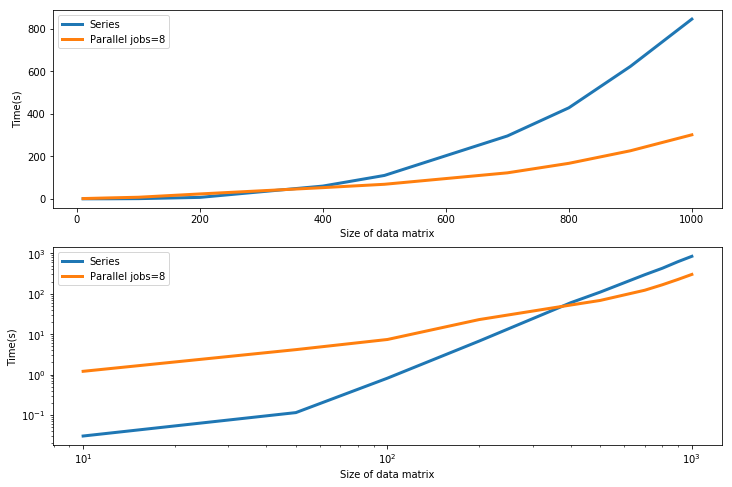

In [6]:
figure(figsize=[12,8])
subplot(2,1,1)
plot(N,S,label='Series',linewidth=3)
plot(N,P,label='Parallel jobs=8',linewidth=3)
ylabel('Time(s)')
xlabel('Size of data matrix')
legend()
subplot(2,1,2)
loglog(N,S,label='Series',linewidth=3)
loglog(N,P,label='Parallel jobs=8',linewidth=3)
ylabel('Time(s)')
xlabel('Size of data matrix')
legend()
show()

In [6]:
my_shelf = shelve.open('./data/data_structures/size')
data = my_shelf['data']
my_shelf.close()
N = [1,2,3,4,5,6,7,8,9,10,15,20,30,40,50]

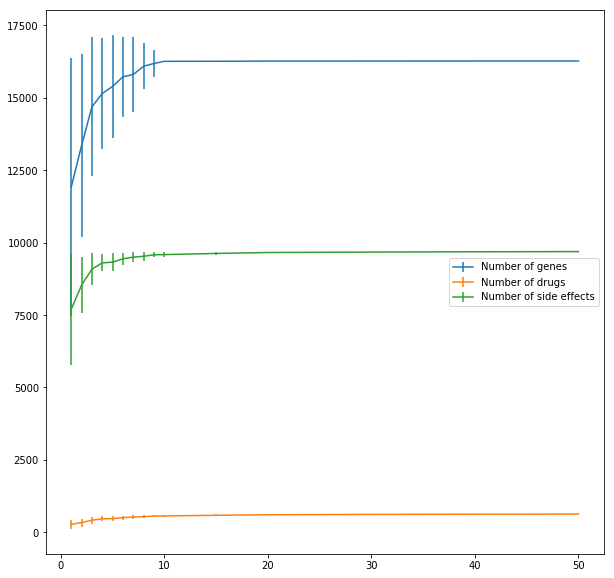

In [7]:
figure(figsize=(10,10))
errorbar(N, data[:,0], yerr=data[:,1], label='Number of genes')
errorbar(N, data[:,2], yerr=data[:,3], label='Number of drugs')
errorbar(N, data[:,4], yerr=data[:,5], label='Number of side effects')
legend()
show()